<a href="https://colab.research.google.com/github/Rohit-Nittala/ImageClassification/blob/main/Pretrained_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [32]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img

from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from IPython.core.display import display


from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19


# Constants


In [4]:
FILE_1 = "01 Umbrella.jpg"
FILE_2 = "02 Couple.jpg"
FILE_3 = "03 Ocean.jpg"

# Preprocessing Images


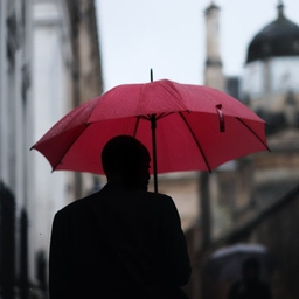

In [13]:
pic = load_img(FILE_1, target_size = (299,299))
display(pic)

In [14]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [15]:
expanded = np.expand_dims(pic_array, axis = 0)
expanded.shape

(1, 299, 299, 3)

In [23]:
preprocessed = preprocess_input(expanded)


In [26]:
def format_img_inceptionresnet(filename):
  pic = load_img(filename, target_size=(299,299))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr, axis = 0)
  preprocessed_input = preprocess_input(expanded)
  return preprocessed_input

In [29]:
def format_img_VGG19(filename):
  pic = load_img(filename, target_size=(224,224))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr, axis = 0)
  preprocessed_input = preprocess_input_vgg19(expanded)
  return preprocessed_input

# Load InceptionResnet

In [16]:
%%time

inception_model = InceptionResNetV2(weights='imagenet')

CPU times: user 8.41 s, sys: 668 ms, total: 9.08 s
Wall time: 8.77 s


In [17]:
inception_model.graph = tf.compat.v1.get_default_graph()


# Making Predictions

In [22]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

1/1 [==============================] - 1s 881ms/step


[[('n04507155', 'umbrella', 0.8298835),
  ('n03788195', 'mosque', 0.0012544562),
  ('n03792972', 'mountain_tent', 0.0012220609),
  ('n03220513', 'dome', 0.0011231123),
  ('n04479046', 'trench_coat', 0.0010624696)]]

1/1 [==============================] - 1s 506ms/step


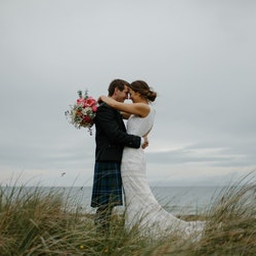

[[('n10148035', 'groom', 0.60605687),
  ('n03450230', 'gown', 0.17247006),
  ('n11879895', 'rapeseed', 0.022018956),
  ('n09421951', 'sandbar', 0.017883247),
  ('n03534580', 'hoopskirt', 0.011139435)]]

In [27]:
data = format_img_inceptionresnet(FILE_2)
prediction = inception_model.predict(data)
display(load_img(FILE_2))
decode_predictions(prediction)


# Testing the VGG19 Model


In [30]:
vgg19_model = VGG19()

574710816/574710816 [==============================] - 8s 0us/step


1/1 [==============================] - 2s 2s/step


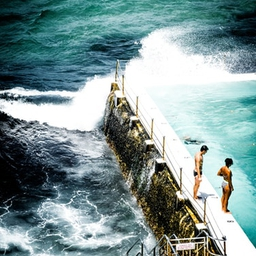

[[('n04347754', 'submarine', 0.18223202),
  ('n02894605', 'breakwater', 0.12564306),
  ('n09399592', 'promontory', 0.08675305),
  ('n02981792', 'catamaran', 0.08607801),
  ('n03662601', 'lifeboat', 0.085170485)]]

In [33]:
data = format_img_VGG19(FILE_3)
pred = vgg19_model.predict(data)
display(load_img(FILE_3))
decode_vgg19(pred)

1/1 [==============================] - 1s 1s/step


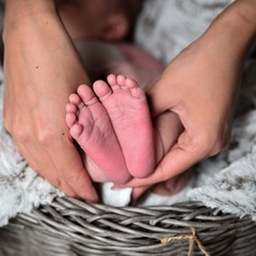

[[('n07880968', 'burrito', 0.33355778),
  ('n01817953', 'African_grey', 0.1090562),
  ('n03992509', "potter's_wheel", 0.048200753),
  ('n07860988', 'dough', 0.03728443),
  ('n01748264', 'Indian_cobra', 0.026734088)]]

In [34]:
data = format_img_VGG19('06 Feet.jpg')
pred = vgg19_model.predict(data)
display(load_img('06 Feet.jpg'))
decode_vgg19(pred)